In [9]:
import pandas as pd
import numpy as n
import matplotlib as m
import seaborn as s
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

#dt = dataset
dt = pd.read_excel("bankLimpo_0.1.xlsx")
dt

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,30,2,3,3,1,1787,1,1,2,79,1,-1,0,3,1
1,33,4,1,2,0,502,0,0,2,261,1,-1,0,0,1
2,35,7,3,1,0,229,0,0,1,97,1,-1,0,0,1
3,30,11,2,2,0,2089,1,0,2,132,1,-1,0,0,1
4,59,12,3,2,0,451,1,0,2,652,1,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,2,2,2,0,157,1,0,2,33,31,-1,0,0,0
4517,57,6,2,3,0,1932,1,0,0,192,32,-1,0,0,0
4518,57,12,2,1,0,0,1,0,0,29,32,-1,0,0,0
4519,28,11,2,1,0,371,1,0,2,18,44,-1,0,0,0


In [2]:
x = dt.iloc[:,0:15].values
x = dt.drop(dt.columns[14], axis=1)
y = dt.iloc[:,14].values

#display(x)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_test


,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
4274,35,12,1,2,0,748,0,0,1,94,7,130,3,1
72,31,5,2,2,0,152,1,0,0,563,1,-1,0,0
1065,30,2,2,2,0,270,1,0,0,116,1,-1,0,0
3185,42,3,2,4,0,756,0,0,2,396,3,-1,0,0
130,41,12,2,2,0,3608,1,0,0,231,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,45,2,1,2,0,622,0,0,2,1451,2,-1,0,0
2106,47,12,2,1,0,607,0,0,0,29,2,-1,0,0
242,44,10,2,3,0,2,1,0,2,180,1,-1,0,0
4402,41,12,2,2,0,120,1,0,0,20,11,-1,0,0


In [4]:
rf = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

In [5]:
previsao = rf.predict(x_test)
previsao

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [6]:
accuracy_score(y_test, previsao)

0.8912466843501327

C:\Users\Pedro Evaristo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8912466843501327

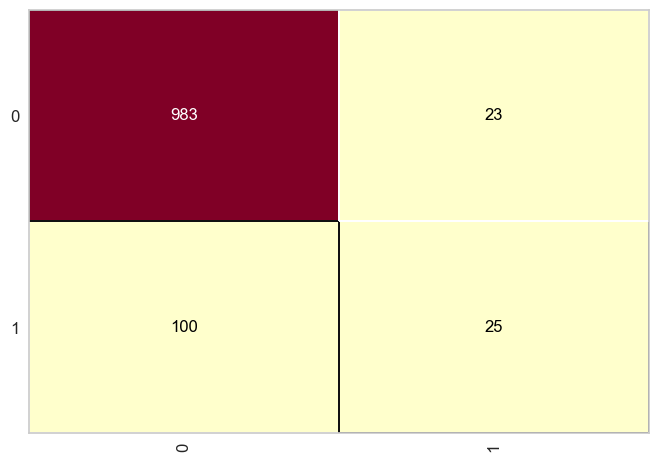

In [7]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)



In [8]:
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1006
           1       0.52      0.20      0.29       125

    accuracy                           0.89      1131
   macro avg       0.71      0.59      0.62      1131
weighted avg       0.86      0.89      0.87      1131

